### Cho dữ liệu bbc (giải nén file bbc-fulltext)
### Yêu cầu : Chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc phân cụm dữ liệu dựa trên cột content của dataframe news trên.
1. Áp dụng thuật toán thích hợp. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?
2. Tìm kết quả => có bao nhiêu cụm => mẫu (tin tức) nào thuộc cụm nào?
3. Nhận xét trên từng cụm: mỗi cụm có những keywords nào ? Vẽ WordClouds cho từng cụm.
4. Kiểm chứng lại với class đã có

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn. metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


## Đọc dữ liệu

In [2]:
directory = '../../Data/bbc/'

In [3]:
Classes = os.listdir(directory)
Classes

['business', 'entertainment', 'politics', 'README.TXT', 'sport', 'tech']

In [4]:
# Remove if not directory
for item in Classes:
    if not os.path.isdir(directory+item):
        Classes.remove(item)
Classes

['business', 'entertainment', 'politics', 'sport', 'tech']

In [5]:
data = []

In [6]:
for Class in Classes:
    for file in os.listdir(directory+Class):
        try:
            with open(directory+Class+'/'+file, encoding='utf8') as f:
                lines = ""
                for line in f:
                    lines = line + " \n "
                data.append((lines, Class))
        except:
            pass

In [7]:
df = pd.DataFrame(data, columns=['Content', 'Class'])
df.head()

,Content,Class
0,TimeWarner is to restate its accounts as part ...,business
1,Worries about the deficit concerns about China...,business
2,Rosneft officials were unavailable for comment...,business
3,It also reported on Friday that passenger numb...,business
4,Pernod's last major purchase was a third of US...,business


In [8]:
unique_elements, counts_elements = np.unique(df.Class, return_counts=True)
print("Frequency of each category:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of each category:
[['business' 'entertainment' 'politics' 'sport' 'tech']
 [510 386 417 510 401]]


## Tiền xử lý

In [9]:
count = CountVectorizer()
count.fit(df.Content)
bag_of_words = count.transform(df.Content)
bag_of_words

<2224x19096 sparse matrix of type '<class 'numpy.int64'>'
	with 201450 stored elements in Compressed Sparse Row format>

In [10]:
X = bag_of_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
X.shape

(2224, 19096)

## K-Means

In [12]:
# Chọn k
distortions = [] # Chứa WSSE tương ứng
K = range(1, 8)
for k in K:
    kmeanModel = KMeans(n_clusters=k) # Số cụm
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


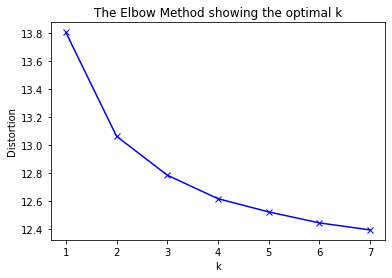

In [13]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Chọn K=5

In [14]:
# => Select k = 3
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 1.96969697e-01 -3.79470760e-19  1.08225108e-02 ...  4.32900433e-03
   2.16450216e-03 -3.79470760e-19]
 [ 1.27684964e-01  5.42101086e-19  5.96658711e-03 ...  2.16840434e-18
   5.42101086e-19  5.42101086e-19]
 [ 1.82795699e-01 -2.16840434e-19  2.60208521e-18 ... -8.67361738e-19
  -2.16840434e-19 -2.16840434e-19]
 [ 6.76923077e-02 -1.08420217e-19  3.07692308e-03 ...  3.07692308e-03
  -1.08420217e-19 -1.08420217e-19]
 [ 1.16222760e-01  2.42130751e-03  2.42130751e-03 ...  2.42130751e-03
  -2.71050543e-19  2.42130751e-03]]
[4 2 1 ... 3 2 3]


In [15]:
df['Group'] = pd.Series(labels)
df.head()

,Content,Class,Group
0,TimeWarner is to restate its accounts as part ...,business,4
1,Worries about the deficit concerns about China...,business,2
2,Rosneft officials were unavailable for comment...,business,1
3,It also reported on Friday that passenger numb...,business,1
4,Pernod's last major purchase was a third of US...,business,4


In [16]:
from wordcloud import WordCloud, STOPWORDS

### * Lấy tối đa 30 từ

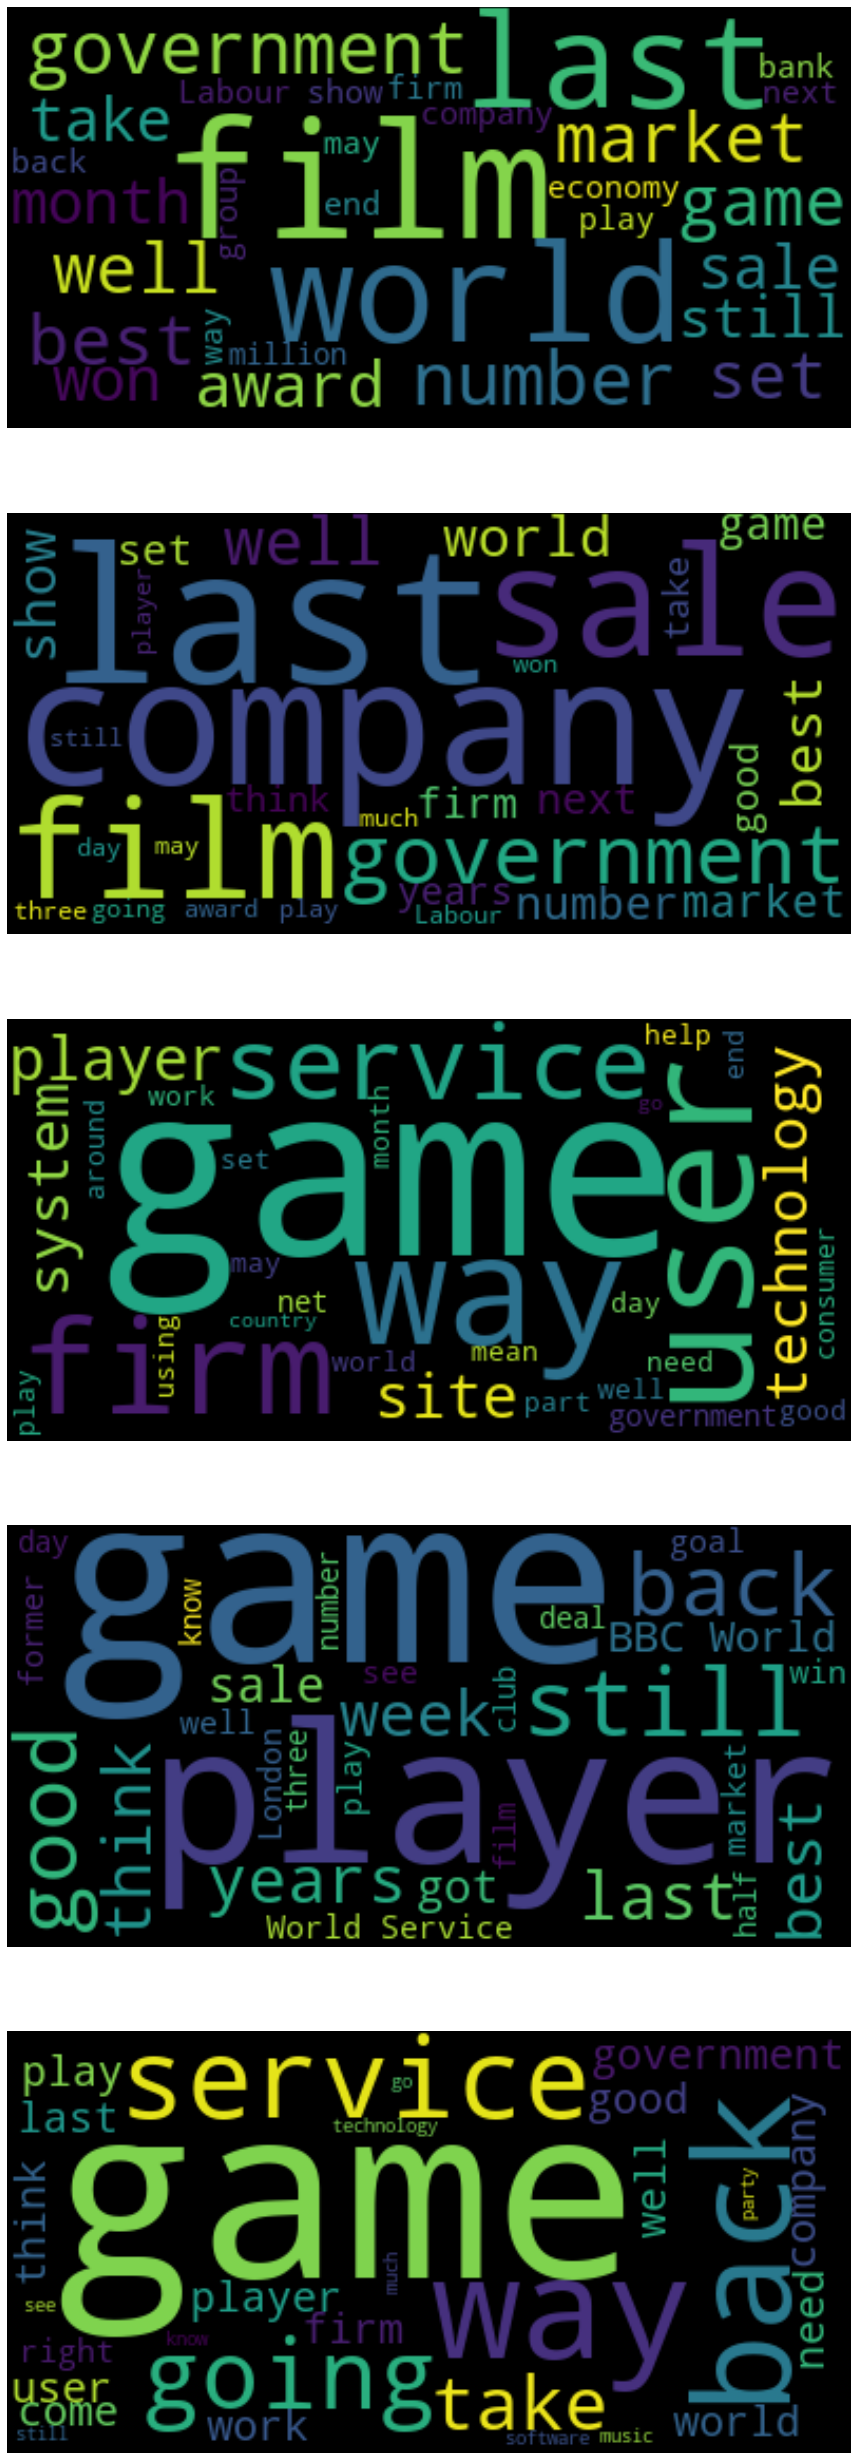

In [17]:
plt.figure(figsize=(16, 45))
for i in range(0,5):
    # print(i+1 ,'/ ',np.unique(df['class'])[i])
    stopwords = set(STOPWORDS)
    comment_words_class = ' '.join(df[df['Group']==i].Content)
    stopwords.update(["Mr", "want", "many", "use", "used", "first", "one", "new", "two", "including", "time","will", "said", "say", "made", "added", "now", "year", "UK", "US", "make", "people"])
    wc = WordCloud(max_words=30, stopwords=stopwords)
    wc.generate(comment_words_class)
    plt.subplot(5, 1, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
plt.show()

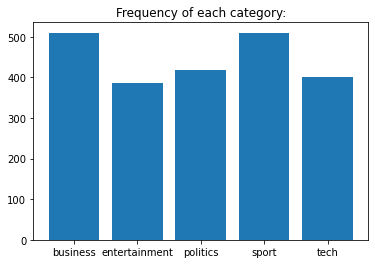

In [18]:
plt.bar(unique_elements, counts_elements)
plt.title("Frequency of each category:")
plt.show()

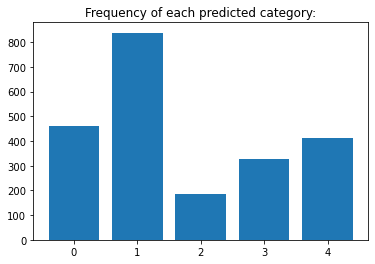

In [19]:
unique_elements_predict, counts_elements_predict = np.unique(df.Group, return_counts=True)
plt.bar(unique_elements_predict, counts_elements_predict)
plt.title("Frequency of each predicted category:")
plt.show()

# Nhận xét
* Chênh lệch số lượng giữa dự đoán và thực tế khá lớn
* Dùng K-Means không thực sự phù hợp

## Gaussian Mixture Model

### Giảm chiều dữ liệu để tránh tràn bộ nhớ

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=1000)
principalComponents = pca.fit_transform(X)

In [22]:
from sklearn.mixture import GaussianMixture

In [23]:
gmm = GaussianMixture(n_components=5)
gmm.fit(principalComponents)

GaussianMixture(n_components=5)

In [24]:
print(gmm.weights_)

[0.38758993 0.08003597 0.20503597 0.17895683 0.14838129]


In [25]:
gmm_labels = gmm.predict(principalComponents)

In [26]:
df['GMM_Group'] = pd.Series(gmm_labels)
df.head()

,Content,Class,Group,GMM_Group
0,TimeWarner is to restate its accounts as part ...,business,4,3
1,Worries about the deficit concerns about China...,business,2,1
2,Rosneft officials were unavailable for comment...,business,1,0
3,It also reported on Friday that passenger numb...,business,1,0
4,Pernod's last major purchase was a third of US...,business,4,0


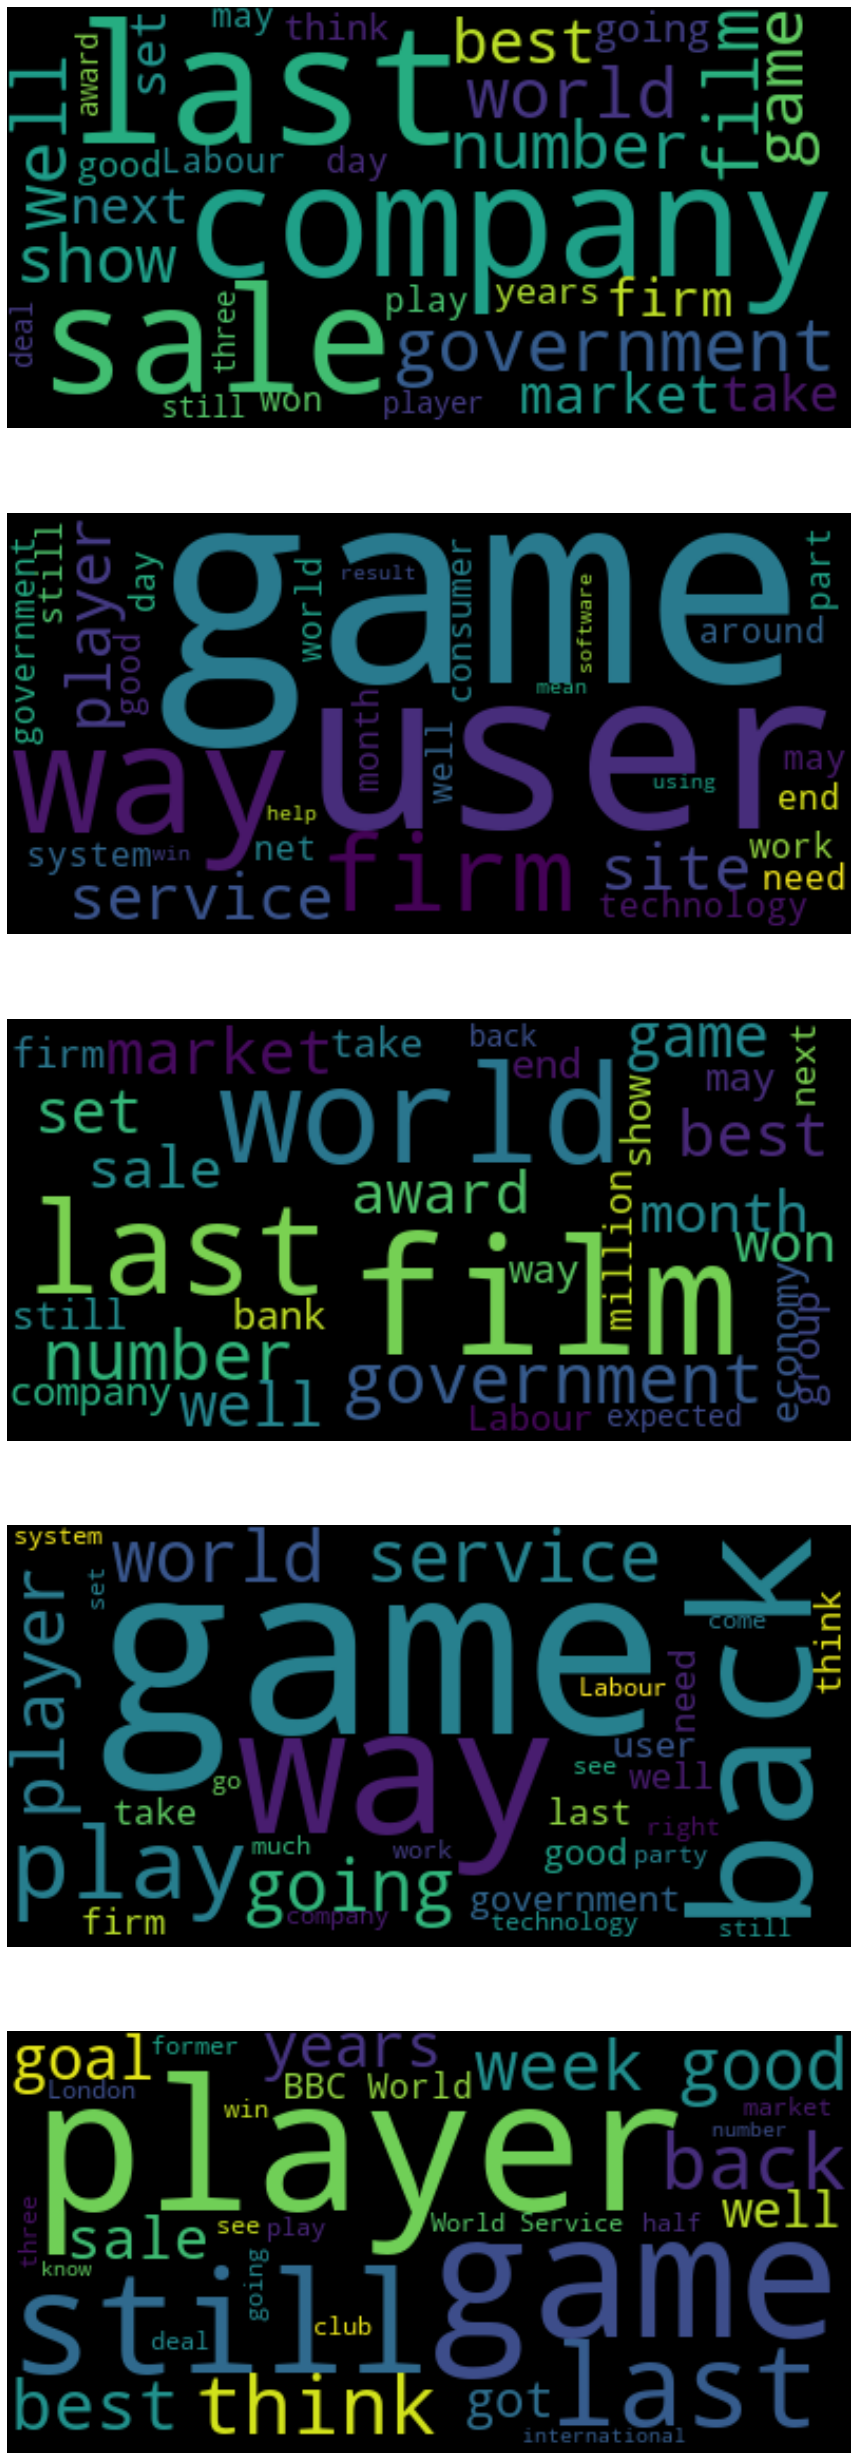

In [27]:
plt.figure(figsize=(16, 45))
for i in range(0,5):
    # print(i+1 ,'/ ',np.unique(df['class'])[i])
    stopwords = set(STOPWORDS)
    comment_words_class = ' '.join(df[df['GMM_Group']==i].Content)
    stopwords.update(["Mr", "want", "many", "use", "used", "first", "one", "new", "two", "including", 
                      "time","will", "said", "say", "made", "added", "now", "year", "UK", "US", "make", "people"])
    wc = WordCloud(max_words=30, stopwords=stopwords)
    wc.generate(comment_words_class)
    plt.subplot(5, 1, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
plt.show()

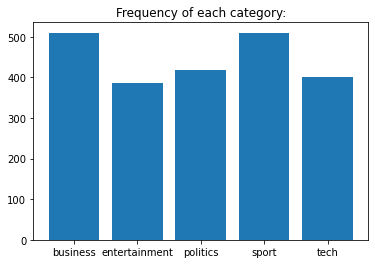

In [28]:
plt.bar(unique_elements, counts_elements)
plt.title("Frequency of each category:")
plt.show()

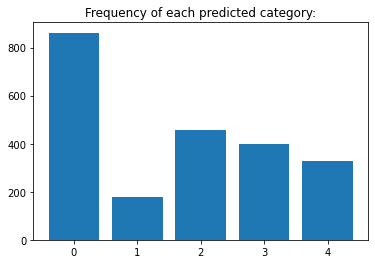

In [29]:
unique_elements_predict, counts_elements_predict = np.unique(df.GMM_Group, return_counts=True)
plt.bar(unique_elements_predict, counts_elements_predict)
plt.title("Frequency of each predicted category:")
plt.show()

# Nhận xét
* Chênh lệch số lượng giữa dự đoán và thực tế khá lớn
* Không cải thiện so với K-Means